### Delay Line: Reservoir

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Delay Line Reservoir

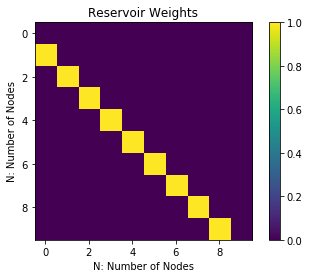

In [7]:
#np.full((3,3), fill_value = 1)
cyclic_weight = 1
n_nodes = 10

weights = np.zeros((n_nodes, n_nodes), dtype=np.int32) #np.float32)
#weights[0, -1] = cyclic_weight <-- This is the only difference between the cyclic reservoir and the delay line.
for i in range(n_nodes - 1):
    #weights[i + 1, i] = cyclic_weight
    weights[i+1, i] = cyclic_weight
#weights[0, ]
pd.DataFrame(weights)
plt.imshow(weights)
plt.xlabel("N: Number of Nodes")
plt.ylabel("N: Number of Nodes")
plt.title("Reservoir Weights")
plt.colorbar()

### Cyclic Reservoir

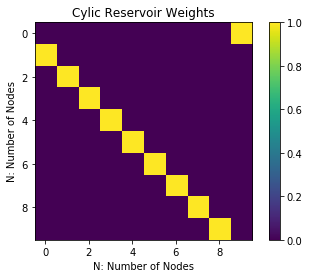

In [8]:
#np.full((3,3), fill_value = 1)
cyclic_weight = 1
n_nodes = 10

weights = np.zeros((n_nodes, n_nodes), dtype=np.int32) #np.float32)
#weights[0, -1] = cyclic_weight <-- This is the only difference between the cyclic reservoir and the delay line.
for i in range(n_nodes - 1):
    #weights[i + 1, i] = cyclic_weight
    weights[i+1, i] = cyclic_weight
weights[0, -1] = cyclic_weight
pd.DataFrame(weights)
plt.imshow(weights)
plt.xlabel("N: Number of Nodes")
plt.ylabel("N: Number of Nodes")
plt.title("Cylic Reservoir Weights")
plt.colorbar()

### Random Reservoir

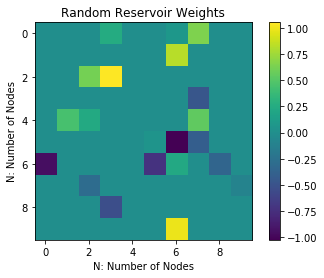

In [9]:
n = 10
connectivity = 0.2
spectral_radius = 0.99

accept = np.random.uniform(size = (n, n)) < connectivity

weights = np.random.uniform( -1., 1., size = (n, n))
weights *= accept
max_eigenvalue = np.abs( np.linalg.eigvals( weights)).max()


# Set spectral radius of weight matrix
weights *= spectral_radius / max_eigenvalue
plt.imshow(weights)
plt.xlabel("N: Number of Nodes")
plt.ylabel("N: Number of Nodes")
plt.title("Random Reservoir Weights")
plt.colorbar()

In [11]:
def sin_sq(arr):
    temp = np.sin(arr)
    return(temp**2)

### Delay Line Input Weights:  The only output is a single number for the first node of the Rc.

Input Weights (bias = 1, beta = 100)


array([[ 50., 100., 100., 100., 100., 100., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.]])


Inputs
[ 1.          0.84085185 -0.09388494  0.69828172  0.61685408 -0.90814753
 -0.15390452]
150.00506574709124

Output


array([150.00506575,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

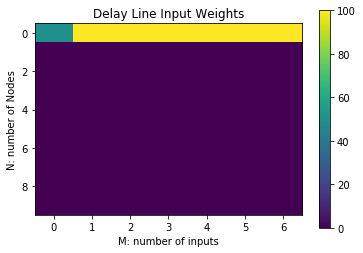

In [12]:
beta = 100
alpha = 50
n_nodes = 10
n_inputs = 6
input_bias = np.full((1,), fill_value = alpha)
input_weights = np.full((n_inputs,), fill_value = beta)

input_weights = np.hstack((input_bias, input_weights))
input_weights_zeroes = np.zeros((n_nodes-1, n_inputs + 1))

input_weights = np.vstack((input_weights, input_weights_zeroes))
print("Input Weights (bias = 1, beta = 100)")
display(input_weights)
plt.imshow(input_weights, aspect = 0.5)
plt.xlabel("M: number of inputs")
plt.ylabel("N: number of Nodes")
plt.title("Delay Line Input Weights")
plt.colorbar()
orig_inputs = np.random.uniform(-1, 1, size = n_inputs)
inputs = np.hstack((1, orig_inputs))
print("")
print("Inputs")
print(inputs)
print(alpha + np.sum(orig_inputs)*beta)
print("")
print("Output")
display(input_weights @ inputs.T)

### Random Input Weights


Inputs
[ 1.          0.85067624  0.42230204  0.12144319  0.59903553  0.11866895
 -0.20713106]
240.49948833972317

Output


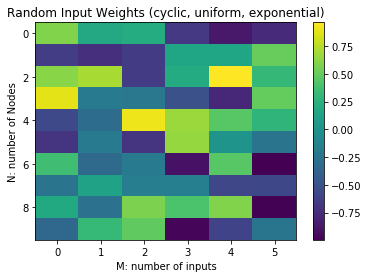

In [14]:
beta = 100
alpha = 50
n_nodes = 10
n_inputs = 6
input_bias = np.full((1,), fill_value = alpha)
input_weights = np.full((n_inputs,), fill_value = beta)

input_weights = np.hstack((input_bias, input_weights))
input_weights_zeroes = np.zeros((n_nodes-1, n_inputs + 1))

input_weights = np.random.uniform(-1, 1, size = (n_nodes, n_inputs))
#print("Input Weights (bias = 1, beta = 100)")
#display(input_weights)
plt.imshow(input_weights, aspect = 0.5)
plt.xlabel("M: number of inputs")
plt.ylabel("N: number of Nodes")
plt.title("Random Input Weights (cyclic, uniform, exponential)")
plt.colorbar()
orig_inputs = np.random.uniform(-1, 1, size = n_inputs)
inputs = np.hstack((1, orig_inputs))
print("")
print("Inputs")
print(inputs)
print(alpha + np.sum(orig_inputs)*beta)
print("")
print("Output")

### MISC Section 